# Chapter 3 - Linear Regression

Linear Regression a very simple approach for supervised learing.
In particular, Linear regression is a useful tool for preadicting a quantitative response.
What information would be useful in order to provide such a recommendation?

for example:
1. In there a relationship between advertising budget and sales?(testing)
- How strong is the relationship between advertising budget and sales?
- Which media contribute to sales?
- How accurately can we estimate the effect of each medium on sales?
- How accurately can we predict future sales?
- Is the reationship linear? (dignostic)
- Is there synergy among the advertising media?


# Outline

- [Load Datasets](#Load-Datasets)
- [3.1 Simple Linear Regression](#3.1-Simple-Linear-Regression)
- [3.2 Multiple Linear Regression](#3.2-Multiple-Linear-Regression)
- [3.3 Other Considerations in the Regression Model](#3.3-Other-Considerations-in-the-Regression-Model)


In [124]:
import pandas as pd #dataframe
import numpy as np #linear algebra
import matplotlib.pyplot as plt #notebook plot
from mpl_toolkits.mplot3d import axes3d #3D plot 
import seaborn as sns # stat plot
import plotly.graph_objects as go

from sklearn.preprocessing import scale #scale shift
import sklearn.linear_model as skl_lm #linear model
from sklearn.metrics import mean_squared_error, r2_score #metric
import statsmodels.api as sm #statmodel
import statsmodels.formula.api as smf  #formula
import statsmodels.stats.api as sms #statistic test
import lmdiag

import scipy.stats as stats
%matplotlib inline
plt.style.use('seaborn-white')

## Load Datasets

In [125]:
#read data
advertising=pd.read_csv('DATA/Advertising.csv',usecols=[1,2,3,4])
advertising.info()
advertising.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [126]:
credit = pd.read_csv('Data/Credit.csv', usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head(5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [127]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
auto.info()
auto.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## 3.1 Simple Linear Regression

### Simple Linear Regression 
If $f$ is to be approximated by a linear function, then we can write this relationship as 
\begin{align}
Y&=f(X)+\epsilon\\
    &=\beta_0+\beta_1X+\epsilon
\end{align}

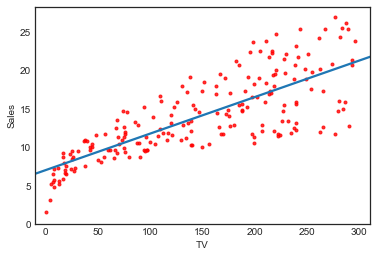

In [128]:
#SCatter plot and regression (regplot)
sns.regplot(advertising.TV,
            advertising.Sales,order=1,
            ci=None,
            scatter_kws={'color':'r','s':9})
plt.xlim(-10,310);
plt.ylim(ymin=0);


### Figure 3.2 - Regression coefficients - RSS
We define the $\textit{residual sum of squares}$ as 
\begin{align}
RSS=e^2_1+e^2_2+\cdots+e^2_n,
\end{align}
The least squares approach chooses $\hat{\beta}_0$ and $\hat{\beta}_1$ to minimize the RSS
\begin{align}
\hat{\beta}_1&=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}\\
\hat{\beta}_0&=\bar{y}-\hat{\beta}_1\bar{x}
\end{align}

In [129]:
regr=skl_lm.LinearRegression()

x=scale(advertising.TV, with_mean=False,with_std=False).reshape(-1,1)
y = advertising.Sales

regr.fit(x,y)
print("intecept:",regr.intercept_,'\n',
        "scale:",regr.coef_ )

intecept: 7.032593549127693 
 scale: [0.04753664]


In [130]:
regr=skl_lm.LinearRegression()
X=scale(advertising.TV, with_mean=True,with_std=False).reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print("intecept:",regr.intercept_,'\n',
        "scale:",regr.coef_ )

intecept: 14.0225 
 scale: [0.04753664]


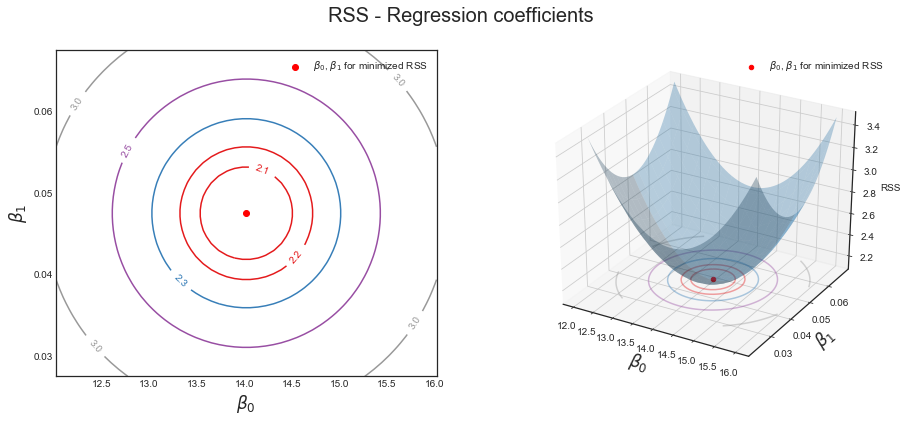

In [131]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

#### 3.1.2 Assessing the Accuracy of the coefficient Estimates
* H0: There is no relationship between X and Y
* H1: There is some relationship between X and Y

Mathematically, this corresponds to testing
* H0: $\beta_1=0$
* H1: $\beta_1\neq 0$

the $t-statistic$ given by

\begin{align}
t=\frac{\hat{\beta}_1-0}{SE(\hat{\beta}_1)}\sim t_{(N-2)}
\end{align}

If we want test 
* H0: $\beta_1=k$
* H1: $\beta_1\neq k$

the $t-statistic$ given by
\begin{align}
t=\frac{\hat{\beta}_1-k}{SE(\hat{\beta}_1)}\sim t_{(N-2)}
\end{align}


### Prove 
Since the true errors are unobservable, we replace them by the OLS residuals, 
then the random variable $\hat{\sigma}^2$ has a chi-square distribution with $N-2$ degrees of freedom:
\begin{align}
V = \dfrac{\sum_{i = 1}^N \widehat{\epsilon}^2_i}{\sigma^2} = \dfrac{(N-2)\widehat{\sigma}^2}{\sigma^2} = \left(\dfrac{N-2}{\sigma^2}\right)\widehat{\sigma}^2 \sim \chi^2_{N-2}
\end{align}
$Z_i \sim \mathcal{N}(0,1)$ and $V\sim \chi^2_{N-2}$
we can define the following random variable:
\begin{align}
t_i = \dfrac{Z_i}{\sqrt{V/(N-2)}}  \sim t_{(N-2)}
\end{align}


In [132]:
est = smf.ols('Sales ~ TV', advertising).fit()
est
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


\begin{align}
    RSE=\sqrt{\frac{RSS}{n-2}}=\sqrt{\frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{n-2}}
\end{align}

In [133]:
#sum of square residual RSS
((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()
sm.stats.anova_lm(est,typ=2)

,sum_sq,df,F,PR(>F)
TV,3314.618167,1.0,312.144994,1.467390e-42
Residual,2102.530583,198.0,NaN,NaN


### Table 3.1 & 3.2 - (Scikit-learn)

In [134]:
regr = skl_lm.LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales
regr.fit(X,y)
print("intercept:",regr.intercept_,'\n',
     "regr.coef:",regr.coef_)

intercept: 7.032593549127693 
 regr.coef: [0.04753664]


In [135]:
Sale_pred=regr.predict(X)
print('R-square:',r2_score(y,Sale_pred))

R-square: 0.611875050850071


## 3.2 Multiple Linear Regression


Simple linear regression is a useful approach for predicting a response on the basis of a single predictor variable. 
However, in practice we often have more than one predictor.
Then the multiple linear regression model takes the form 
\begin{align}
Y&=\beta_0+\beta_1 X_1+\beta_2 X_2+\cdots+\beta_p X_p+\varepsilon.\\
 &=\mathbf{X}\mathbf{\beta}+\varepsilon
\end{align}

$\hat{\varepsilon}=MSE$
### Table 3.3 -  Single Linear Regression (Statsmodels)

In [136]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [137]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


### Estimating the Regression Coefficients (Solve)
\begin{align}
\hat{\mathbf{\beta}}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}
\end{align}
then the OLS estimators have a normal conditional distribution
\begin{align}
\widehat{\boldsymbol{\beta}} | \mathbf{X} \sim \mathcal{N} \left(\boldsymbol{\beta}, \sigma^2 \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \right)
\end{align}

In [138]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


In [139]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [140]:
regr = skl_lm.LinearRegression()

X = advertising[['TV','Radio','Newspaper']].as_matrix()
y = advertising.Sales

regr.fit(X,y)
print('Intercept:',format(regr.intercept_,'.4f'),'\n',
         'TV:',format(regr.coef_[0],'.4f'),'\n',
       'Radio:',format(regr.coef_[1],'.4f'),'\n',
        'Newspaper:',format(regr.coef_[2],'.4f'),'\n')


Intercept: 2.9389 
 TV: 0.0458 
 Radio: 0.1885 
 Newspaper: -0.0010 



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



## Some important Questions

1. [Is at least  one of the predictors $X_1,X_2,\ldots,X_p$ useful in predicting the response?](#1.There-are-Relationship-Between-the-Response-and-Predictors-?)
- [Do all the predictors help to explain $Y$, or is only a subset of the predictors useful?](#2.which-one-?-Deciding-on-important-Variables)
- [How well does the model fit the data?](#3.Model-Fit)
- [Given a set of predictor values, what response value should we predict, and how accurate is our prediction?](#4.Prediction)



### 1.There are Relationship Between the Response and Predictors ?
In order to determine whether there is a relationship betweem the response and the predictor we can simply check whether $\beta_1=0$. In the multiple regression setting with $p$ predcitors.
* H0: $\beta_1=\beta_2=\cdots=\beta_p=0$
* H1: at least one $\beta_j$ is non-zero.
\begin{align}
F=\frac{(TSS-RSS)/p}{RSS/(n-p-1)}
\end{align}
why we use F statistic
since the linear model assumptions are correct, one can show that
\begin{align}
\mbox{E}\left(RSS/(n-p-1)\right)=\sigma^2
\end{align}
and that, provided $H_0$ is true,
\begin{align}
\mbox{E}\left((TSS-RSS)/(p)\right)=\sigma^2
\end{align}
If $H_1$ IS TRUE, then $\mbox{E}\left((TSS-RSS)/(p)\right)>\sigma^2$, so we expect $F$ to be greater than 1


In [141]:
est.summary().tables[0]

Dep. Variable:,Sales,R-squared:,0.897
Model:,OLS,Adj. R-squared:,0.896
Method:,Least Squares,F-statistic:,570.3
Date:,"Tue, 19 Nov 2019",Prob (F-statistic):,1.58e-96
Time:,09:34:15,Log-Likelihood:,-386.18
No. Observations:,200,AIC:,780.4
Df Residuals:,196,BIC:,793.6
Df Model:,3,,
Covariance Type:,nonrobust,,


F-Statistic is 570.3. Since this far larger than 1, it provideds compelling evidence against the null hypothesis $H_0$
###  2.which one ? Deciding on important Variables
which are the guilty ones! 
Ideally, we would like to perform variable selection by trying out a lot of different models, each containing a different subset of the predictors. How do we determine which model is best?
Various can be used to judge the quality of a model.
- Mallow's $C_p$
- Akaike information criterion (AIC)
- Bayesian information criterion (BIC)
- Adjusted $R^2$

This disscussed in more detail in Chapter 6.
Trying out every possible subset of the predictors is infeasible. So
There are three classical approaches for this task:
- Forward selection.
- Backward selection.
- Mixed selection.

-------------------------------------------------------
|Forward selection| Backward selection|Mixed selection|
|:---------------:|:-----------------:|:--------------:|
|Null model       |  full model       | null model    |
|Add variables| remove variables|add variables |
|the lowest RSS| the largest p-value|  if pvalue for variables can become larger <br> as new predictors are added <br>remove the predcitor |
|Some Stop Rule| All P-value below some threshold|forward and backward step<br>until all variables in the model have a sufficiently low p-value|


Backward selection cannot be used if $p>n$, while forward selection can always be used. Forward selection is a greedy approach,
and might include variables early that later become redundant. Mixed selection can remedy this

#### Forward selection

In [142]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model
model=forward_selected(advertising,'Sales')
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9211,0.294,9.919,0.000,2.340,3.502
TV,0.0458,0.001,32.909,0.000,0.043,0.048
Radio,0.1880,0.008,23.382,0.000,0.172,0.204


### 3.Model Fit
Two of the most common numerical measures of model fit are the <b>RSE</b> and $R^2$

In [143]:
est = smf.ols('Sales ~ TV + Radio', advertising).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           4.83e-98
Time:                        09:34:15   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model that uses only <b style="color:Orange">TV</b> and <b style="color:Orange">radio</b> to predict <b style="color:red">Sales</b> has an $R^2$ value of 0.897

In [144]:
advertising[['Radio', 'TV']].describe()
est.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [145]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(est.params[0] + B1[i,j]*est.params[2] + B2[i,j]*est.params[1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning:


The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.



Text(0.5, 0, 'Sales')

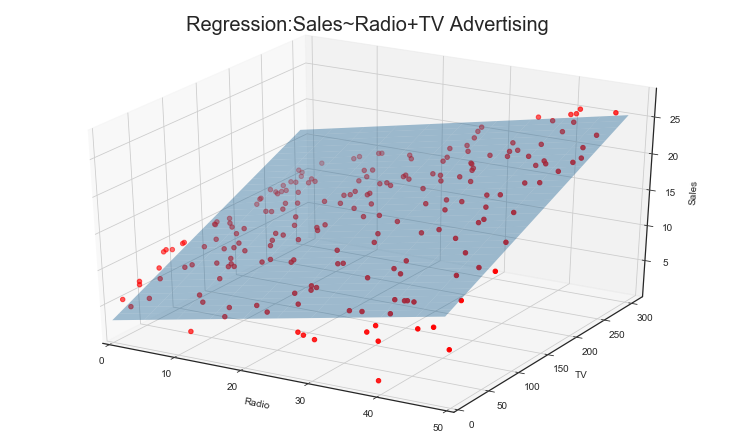

In [146]:
fig =plt.figure(figsize=(10,6))
fig.suptitle('Regression:Sales~Radio+TV Advertising', fontsize=20)
ax=axes3d.Axes3D(fig)

ax.plot_surface(B1,B2,Z,rstride=10,cstride=5,alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')
ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales')

### 4.Prediction
we can calculate a <b>confidence interval for the mean response</b>. 
The expected value of $\hat{Y}$ is an unbiased estimator of $\mathbb{E}(\mathbf{Y}|\mathbf{X}= \widetilde{\mathbf{X}})$:
\begin{aligned}
\mathbb{E}(\widehat{\mathbf{Y}}) &= \mathbb{E}(\widetilde{\mathbf{X}} \widehat{\boldsymbol{\beta}}) \\
&= \widetilde{\mathbf{X}} \left( \mathbb{E}(\widehat{\boldsymbol{\beta}}) \right)\\
&= \widetilde{\mathbf{X}} \boldsymbol{\beta} \\
&= \mathbb{E}(\mathbf{Y} | \mathbf{X} = \widetilde{\mathbf{X}})
\end{aligned}

The variance of the mean response is:
\begin{aligned}
\mathbb{V}{\rm ar} (\widehat{\mathbf{Y}}) &= \mathbb{V}{\rm ar} (\widetilde{\mathbf{X}} \widehat{\boldsymbol{\beta}}) \\
&= \widetilde{\mathbf{X}} \mathbb{V}{\rm ar} ( \widehat{\boldsymbol{\beta}}) \widetilde{\mathbf{X}}^\top \\
&= \widetilde{\mathbf{X}} \sigma^2 \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \widetilde{\mathbf{X}}^\top\\
&= \sigma^2 \widetilde{\mathbf{X}} \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \widetilde{\mathbf{X}}^\top
\end{aligned}

then $\widehat{\mathbf{Y}}$ follows a normal distribution:
\begin{aligned}
\left(\widehat{\mathbf{Y}}|\widetilde{\mathbf{X}}, \mathbf{X}\right) \sim \mathcal{N}\left( \widetilde{\mathbf{X}} \boldsymbol{\beta},\quad  \sigma^2 \widetilde{\mathbf{X}} \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \widetilde{\mathbf{X}}^\top\right)
\end{aligned}
where we can again, replace $\sigma^2$, with its estimate $\hat{\sigma}^2=\dfrac{1}{N-P-1}\sum_{i=1}^N\hat{\epsilon}^2$

In [147]:
MSE=est.mse_resid
Sale=advertising.Sales
X=advertising[['Radio', 'TV']]
X_mat=np.column_stack((np.ones(len(X)), X))
XtX = np.dot(np.transpose(X_mat), X_mat)
XtX1=np.linalg.inv(XtX)

### Confidence 
The $100\cdot(1-\alpha)\%$ confidence interval for the mean response can be calculated as:
\begin{aligned}
\widehat{Y}_i \pm t_{(1 - \alpha/2, N-P-1)} \cdot \text{se}(\widehat{Y}_i)
\end{aligned}

In [148]:
ZL = np.zeros((TV.size, Radio.size))
ZU = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(ZL):
    y_pred_se=MSE*np.dot(np.dot(np.array([1,B1[i,j],B2[i,j]]),XtX1),np.transpose(np.array([1,B1[i,j],B2[i,j]])))
    ZU[i,j] =Z[i,j]+ stats.t.ppf(q = 1 - 0.05 / 2, df =200-2-1) * y_pred_se
    ZL[i,j] =Z[i,j]- stats.t.ppf(q = 1 - 0.05 / 2, df = 200-2-1) * y_pred_se

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning:


The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.



Text(0.5, 0, 'Sales')

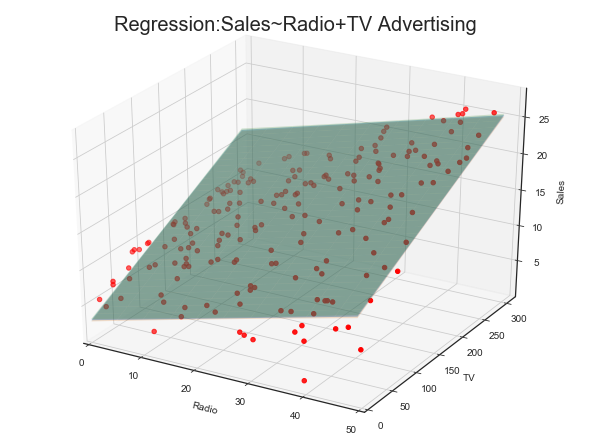

In [149]:
fig =plt.figure(figsize=(8,6))
fig.suptitle('Regression:Sales~Radio+TV Advertising', fontsize=20)
ax=axes3d.Axes3D(fig)

ax.plot_surface(B1,B2,Z,rstride=10,cstride=5,alpha=0.4)
ax.plot_surface(B1,B2,ZL,rstride=10,cstride=5,alpha=0.2)
ax.plot_surface(B1,B2,ZU,rstride=10,cstride=5,alpha=0.2)

ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')
ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales')

### Prediction intervals
We can defined the <b>forecast error</b> as
\begin{aligned}
\widetilde{\boldsymbol{e}} = \widetilde{\mathbf{Y}} - \widehat{\mathbf{Y}} = \widetilde{\mathbf{X}} \boldsymbol{\beta} + \widetilde{\boldsymbol{\varepsilon}} - \widetilde{\mathbf{X}} \widehat{\boldsymbol{\beta}}
\end{aligned}
From the distribution of the dependent variable:
\begin{align}
\mathbf{Y} | \mathbf{X} \sim \mathcal{N} \left(\mathbf{X} \boldsymbol{\beta},\ \sigma^2  \mathbf{I} \right)
\end{align}
the variance of the forecast error is (assuming $\mathbf{X}$ that $\widetilde{\mathbf{X}}$ are fixed):
\begin{aligned}
\mathbb{V}{\rm ar}\left( \widetilde{\boldsymbol{e}}  \right) &=
\mathbb{V}{\rm ar}\left( \widetilde{\mathbf{Y}} - \widehat{\mathbf{Y}}  \right) \\
&= \mathbb{V}{\rm ar}\left( \widetilde{\mathbf{Y}} \right)  - \mathbb{C}{\rm ov} (\widetilde{\mathbf{Y}}, \widehat{\mathbf{Y}}) - \mathbb{C}{\rm ov} ( \widehat{\mathbf{Y}}, \widetilde{\mathbf{Y}})+ \mathbb{V}{\rm ar}\left( \widehat{\mathbf{Y}}  \right) \\
&= \mathbb{V}{\rm ar}\left( \widetilde{\mathbf{Y}} \right)  + \mathbb{V}{\rm ar}\left( \widehat{\mathbf{Y}}  \right)\\
&= \sigma^2 \mathbf{I} + \widetilde{\mathbf{X}} \sigma^2 \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \widetilde{\mathbf{X}}^\top \\
&= \sigma^2 \left(\underbrace{ \mathbf{I}}_{\text{predict error}} + \underbrace{\widetilde{\mathbf{X}} \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \widetilde{\mathbf{X}}^\top}_{\text{Orignal error}}\right)
\end{aligned}

In [150]:
ZL = np.zeros((TV.size, Radio.size))
ZU = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(ZL):
    y_pred_se=MSE*(1+np.dot(np.dot(np.array([1,B1[i,j],B2[i,j]]),XtX1),np.transpose(np.array([1,B1[i,j],B2[i,j]]))))
    ZU[i,j] =Z[i,j]+ stats.t.ppf(q = 1 - 0.05 / 2, df =200-2-1) * y_pred_se
    ZL[i,j] =Z[i,j]- stats.t.ppf(q = 1 - 0.05 / 2, df = 200-2-1) * y_pred_se

## 3.3 Other Considerations in the Regression Model
- [3.3.1 Quantitaive vs Qualitative predictor](#3.3.1-Predictor)
- [3.3.2 Extensions of the Linear Model (interaction term, polynomial)](#3.3.2-Extensions-of-the-Linear-Model)
- [3.3.3 Potential Problems (Diagnostic)](#3.3.3-Potential-Problems)

### 3.3.1 Predictor
In our discussion so far, we have assumed that all variables in our linear
regression model are <i>quantitative</i>. But in practice, this is not necessarily
the case; often some predictors are <i>qualitative</i>.

- Quantitative predictors: 
    - <b style="color:Orange">balance</b> (average credit card debt for a number of individuals), 
    - <b style="color:Orange">age</b>,
    - <b style="color:Orange">cards</b> (number of credit cards),
    - <b style="color:Orange">education</b> (yrars of education),
    - <b style="color:Orange">income</b> (in thousands of dollars),
    - <b style="color:Orange">limit</b> (credit limit),
    - <b style="color:Orange">rating </b> (credit rating)
- Qualitative predictors:  
    - <b style="color:Blue">Gender</b> (Male, Female), 
    - <b style="color:Blue">Student</b> (student status),
    - <b style="color:Blue">Married</b> (marital status),
    - <b style="color:Blue">Enthnicity</b> (Caucasian, African American or Asian)


In [151]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


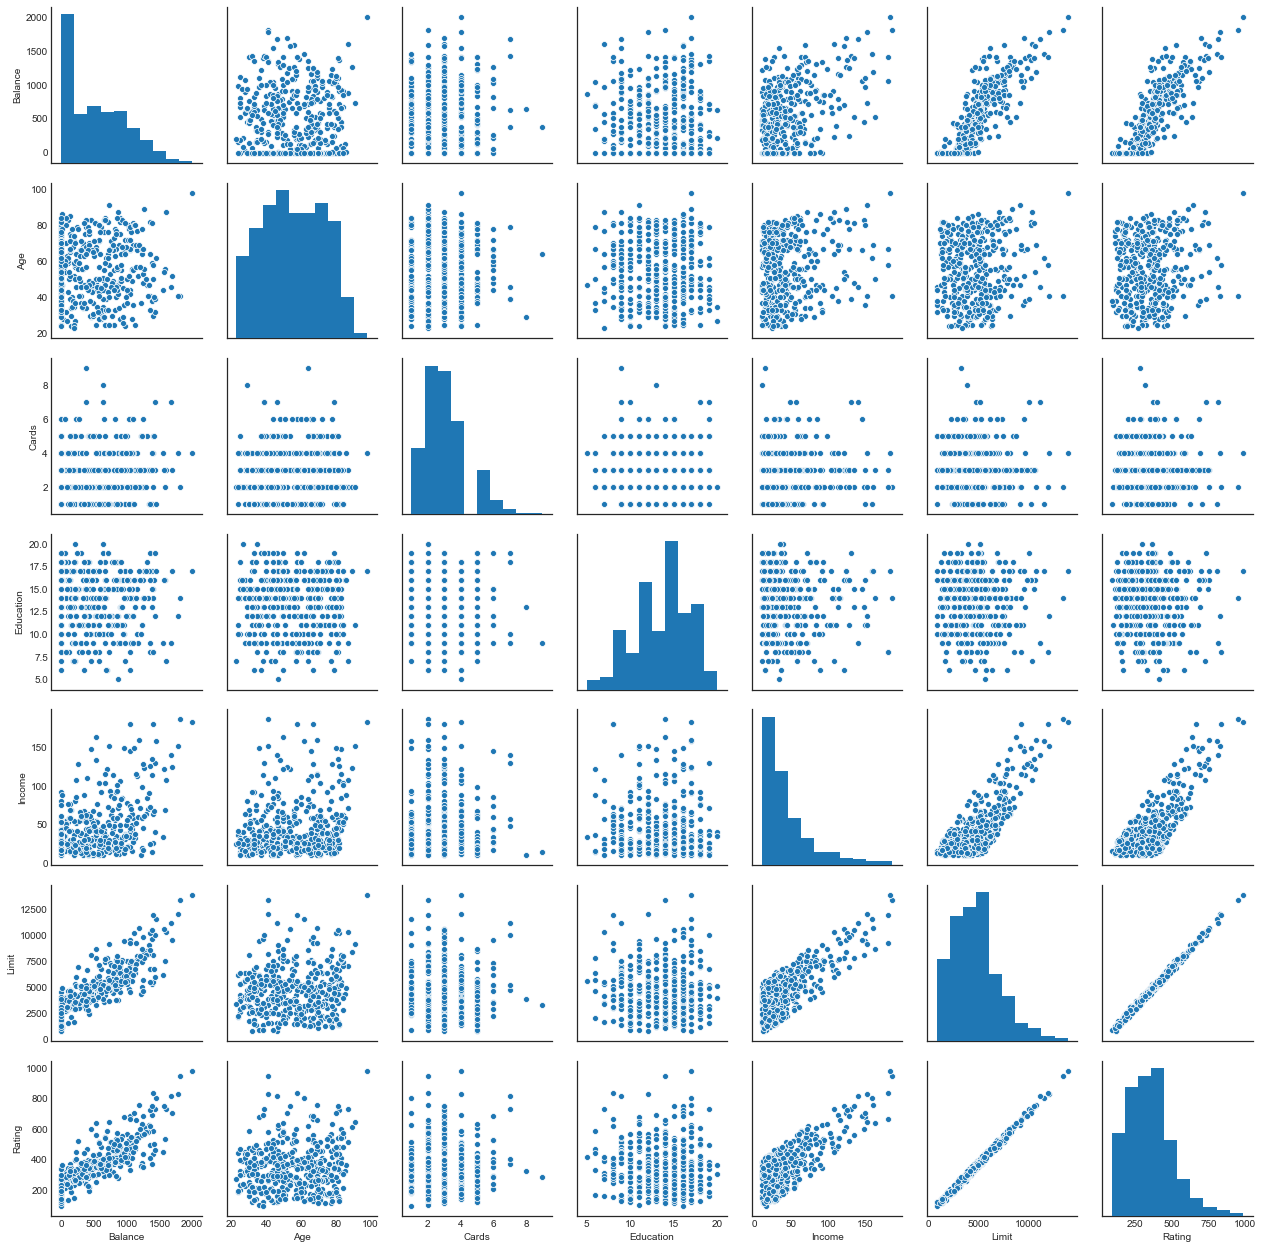

In [152]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]);

###  Two levels or more
If a
qualitative predictor (also known as a factor) only has two levels, or possible values, then incorporating it into a regression model is very simple. We level
simply create an indicator or "<i>dummy variable</i>" that takes on two possible dummy numerical values.

For example, based on the <b style="color:Blue"> gender</b> variable, we can create variable a new variable that takes the form
\begin{align}
x_i=
\begin{cases}
1& \text{if $i$th person is female}\\
0& \text{if $i$th person is male}
\end{cases}
\end{align}
This results in the model
\begin{align}
y_i=\beta_0+\beta_1x_i+\epsilon_i=
\begin{cases}
\beta_0+\beta_1+\epsilon_i& \text{if $i$th person is female}\\
\beta_0+\epsilon_i& \text{if $i$th person is male}
\end{cases}
\end{align}


In [153]:
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Tue, 19 Nov 2019   Prob (F-statistic):              0.669
Time:                        09:34:38   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          509.8031     33.128     15.389      0.000     444.675     574.931
Gender[T.Female]    19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For example, for the <b style="color:Blue"> ethnicity</b> variable we create two dummy variables.
\begin{align}
x_{1i}=
\begin{cases}
1& \text{if $i$th person is Asian}\\
0& \text{if $i$th person is not Asian}
\end{cases}
\end{align}
and the second could be
\begin{align}
x_{2i}=
\begin{cases}
1& \text{if $i$th person is Caucasian}\\
0& \text{if $i$th person is not Caucasian}
\end{cases}
\end{align}
The both of these variables can be used in the regression equation, in order to obtain the model
\begin{align}
y_i=\beta_0+\beta_1x_{1i}+\beta_2x_{2i}+\epsilon_i=
\begin{cases}
\beta_0+\beta_1+\epsilon_i& \text{if $i$th person is Asian}\\
\beta_0+\beta_2+\epsilon_i& \text{if $i$th person is Caucasian}\\
\beta_0+\epsilon_i& \text{if $i$th person is African American.}
\end{cases}
\end{align}

In [154]:
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Tue, 19 Nov 2019   Prob (F-statistic):              0.957
Time:                        09:34:38   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients and their p-values do depend on the choice of dummy variable coding. Rather than rely on the individual coefficients, we can use an F-test to test $H0 : \beta_1 = \beta_2 = 0$; this does not depend on the coding. This F-test has a p-value of 0.96, indicating that we cannot reject the null hypothesis that there is no relationship between balance and ethnicity.

### 3.3.2 Extensions of the Linear Model
Two of the most important assumptions state that the relationship between the
predictors and response are additive and linear. The additive assumption means that the effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values of the other predictors.
###  Interaction term
Which is constructed by computing the product of $X_1$ and $X_2$. The results in the model
\begin{align}
Y=\beta_0+\beta_1X_1+\beta_2X_2+\beta_3X_1X_2+\epsilon
\end{align}

In [155]:
est = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


We can interpret $\beta_3$ as the increase in the effectiveness of TV advertising
for a one unit increase in radio advertising (or vice-versa).

We can use an t-test to test $H_0 : \beta_3 = 0$;
This t-test has a p-value of 0.000, is extremely low, indicating that there is strong evidence for $H_1:\beta_3\neq 0$. In other words, it is clear that the true relationship is not additive. 

However, the concept of
interactions applies just as well to qualitative variables,

In [156]:
est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 2 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


In [157]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           4.94e-28
Time:                        09:34:38   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         200.6232     33.698      5.953      0.000     134.373     266.873
Income              6.2182      0.592     10.502      0.000       5.054       7.382
Student2          476.6758    104.351      4.568      0.000     271.524     681.827
Income:Student2    -1.9992      1.731     -1.155      0.249      -5.403       1.404
==============================================================================
Omnibus:                      107.788   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.158
Skew:                           0.228   Prob(JB):                     1.54e-05
Kurtosis:                       1.941   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Balance without  interaction term

\begin{align}
\text{balance}_i&\approx \beta_0+\beta_1\times\text{income}_i+
\begin{cases}
\beta_2& \text{if $i$th person is a  student}\\
0 &\text{if $i$th person is not a student}
\end{cases}\\
&=+\beta_1\times\text{income}_i+
\begin{cases}
\beta_0+\beta_2& \text{if $i$th person is a  student}\\
\beta_0 &\text{if $i$th person is not a student}
\end{cases}
\end{align}
# Balance with  interaction term
\begin{align}
\text{balance}_i&\approx \beta_0+\beta_1\times\text{income}_i+
\begin{cases}
\beta_2+\beta_3\times\text{income}_i& \text{if student}\\
0 &\text{if not student}
\end{cases}\\
&=
\begin{cases}
(\beta_0+\beta_2)+(\beta_1+\beta_3)\times\text{income}_i& \text{if student}\\
\beta_0+\beta_1\times\text{income}_i&\text{if not student}
\end{cases}
\end{align}

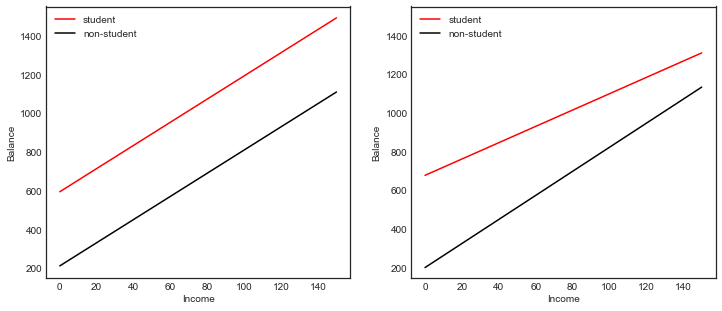

In [158]:
# Income (x-axis)
income = np.linspace(0,150)
student1 = np.linspace(regr1['Intercept']+regr1['Student2'],
                       regr1['Intercept']+regr1['Student2']+150*regr1['Income'])
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

student2 = np.linspace(regr2['Intercept']+regr2['Student2'],
                       regr2['Intercept']+regr2['Student2']+
                       150*(regr2['Income']+regr2['Income:Student2']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# Create plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(ymax=1550)


We note that the slope for students is lower than the slope for non-students.
This suggests that increases in income are associated with smaller increases in credit card balance among
students as compared to non-students.


### Non-linear Relationships
As discussed previously, the linear regression model assumes a linear
relationship between the response and predictors. But in some cases, the
true relationship between the response and the predictors may be nonlinear. Here we present a very simple way to directly extend the linear model
to accommodate non-linear relationships, using <b><i>polynomial regression</i></b>.


In [159]:
auto['horsepower2']=auto.horsepower**2
auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22500.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,19600.0


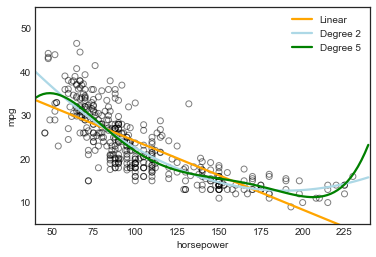

In [160]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

In [161]:
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


If including <b style="color:Blue">horsepower<sup> 2</sup></b> led to such a big improvement in the model, why
not include <b style="color:Blue">horsepower<sup> 3</sup></b>, <b style="color:Blue">horsepower<sup> 4</sup></b>, or even <b style="color:Blue">horsepower<sup> 5</sup></b>? 
The green curve in last figure display the fit that results from including all polynomials up to fifth degree.

The resulting fit seems unnecessarily wiggly—that is, it is unclear that including the additional terms really has led to a better fit to the data.

### 3.3.3 Potential Problems
When we fit a linear regression model to a particular data set, many problems may occur. Most common among these are the following:
1. [Non-linearity of the response-predictor relationships.](#1.Non-linearity-of-the-response-predictor-relationships)
2. [Correlation of error terms.](#2.Correlation-of-Error-Terms)
3. [Non-constant variance of error terms.(heteroscedasticity)](#3.-Non-constant-Variance-of-Error-Terms(heteroscedasticity))
4. [Outliers.](#4.Outliers)
5. [High-leverage points.](#5.High-leverage-Points)
6. [Collinearity.](#6.Collinearity)


#### 1.Non-linearity of the response-predictor relationships
The linear regression model assumes that there is a straight-line relationship between the predictors and the response. If the true relationship is
far from linear, then virtually all of the conclusions that we draw from the fit are suspect. In addition, the prediction accuracy of the model can be significantly reduced.

In [162]:
regr=skl_lm.LinearRegression()
X=auto.horsepower.values.reshape(-1,1)
y=auto.mpg
regr.fit(X,y)
auto['pred1']=regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1
# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']].as_matrix()
regr.fit(X2, y)
auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Text(0.5, 1.0, 'Residual Plot for Quadratic Fit')

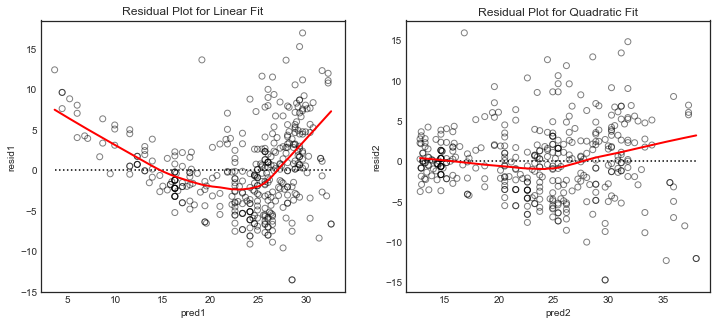

In [163]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.regplot(auto.pred1, auto.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':2},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':2}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')




### 2.Correlation of Error Terms
An important assumption of the linear regression is that <b style='color:Blue'>the error terms are uncorrelated </b>. 
We check Observation against residual

### (Remark) simulation of correlated random data
we generate $X_1$ and $X_2$ from standord normal distribution. Then from there make $X_3$ a linear combination of the two variable,
\begin{align}
X_3 = \rho X_1 + \sqrt{1-\rho^2}\,X_2
\end{align}
So that $X_3$ and $X_3$ have correlation $\rho$. (Note: More method 'Copula')

In [164]:
np.random.seed(777)
s=np.random.normal(0,1,100)
out0=np.zeros(100)
out1=np.zeros(100)
out0[0]=s[0]
out1[0]=s[0]
rho0=0.5
rho1=0.9
for i in range(len(s)-1):
    out0[i+1]=rho0*out0[i]+np.sqrt((1-rho0**2))*s[i+1]
    out1[i+1]=rho1*out1[i]+np.sqrt((1-rho1**2))*s[i+1]


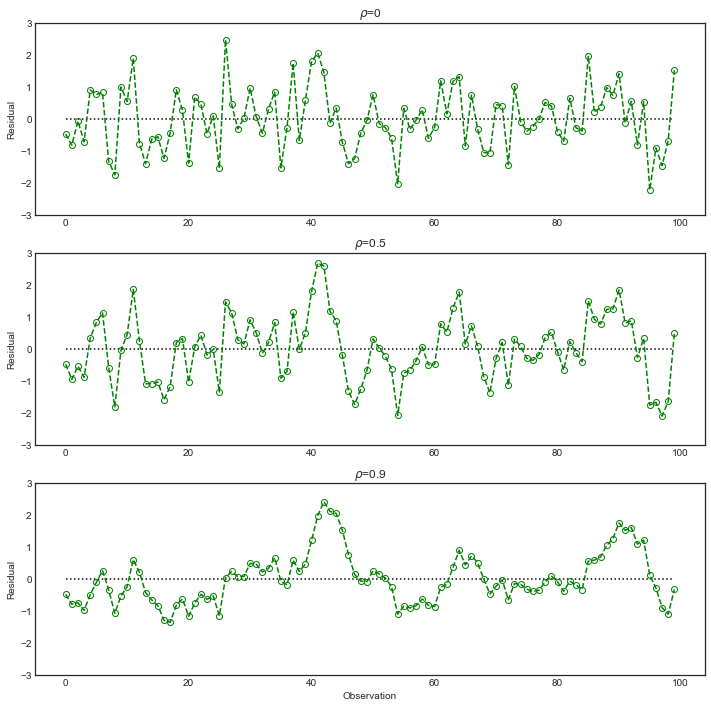

In [165]:
fig, (ax1,ax2,ax3)=plt.subplots(3,1,figsize=(12,12))
ax1.plot(range(len(s)),s, color='green', linestyle='--', marker='o', markerfacecolor='none')
ax1.set_title(r'$\rho$=0')
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')


ax2.plot(range(len(out0)),out0, color='green', linestyle='--', marker='o', markerfacecolor='none')
ax2.set_title(r'$\rho$=0.5')
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')

ax3.plot(range(len(out1)),out1, color='green', linestyle='--', marker='o', markerfacecolor='none')
ax3.set_title(r'$\rho$=0.9')
ax3.hlines(0,xmin=ax3.xaxis.get_data_interval()[0],
           xmax=ax3.xaxis.get_data_interval()[1], linestyles='dotted')
ax3.set_xlabel('Observation')
for ax in fig.axes:
    ax.set_ylabel('Residual')
    ax.set_ylim(-3,3)

we see the residuals from a linear regression fit to data generated with uncorrelated errors. There is no evidence of a time-related trend in the residuals.
In contrast, the residuals in the bottom panel are from a data set in which
adjacent errors had a correlation of 0.9. Now there is a clear pattern in the
residuals—adjacent residuals tend to take on similar values. 

Finally, the center panel illustrates a more moderate case in which the residuals had a correlation of 0.5. There is still evidence of tracking, but the pattern is less clear.



### 3.Non-constant Variance of Error Terms(heteroscedasticity)
Another important assumption of the linear regression model is that the
error terms have a constant variance, $\mbox{Var}(\epsilon_i) = \sigma^2$. The standard errors, confidence intervals, and hypothesis tests associated with the linear model rely upon this assumption.
We check fitted values against Residuals.

Unfortunately, it is often the case that the variances of the error terms are
non-constant. For instance, <b style="color:red">the variances of the error terms may increase with the value of the response</b>.

When faced with this problem, one possible solution is to transform the response $Y$ using a concave function such as $\log Y$ or $\sqrt{Y}$ . Such
a transformation results in a greater amount of shrinkage of the larger responses, leading to a reduction in heteroscedasticity

In [166]:
regr=skl_lm.LinearRegression()
X2 = auto[['horsepower', 'horsepower2']].as_matrix()
y=auto.mpg
regr.fit(X2,y)
auto['pred1']=regr.predict(X2)
auto['resid1'] = auto.mpg - auto.pred1
# Quadratic fit
y1=np.log(y)
regr.fit(X2, y1)
auto['pred2'] = regr.predict(X2)
auto['resid2'] = y1 - auto.pred2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



Text(0.5, 1.0, 'Response log(Y)')

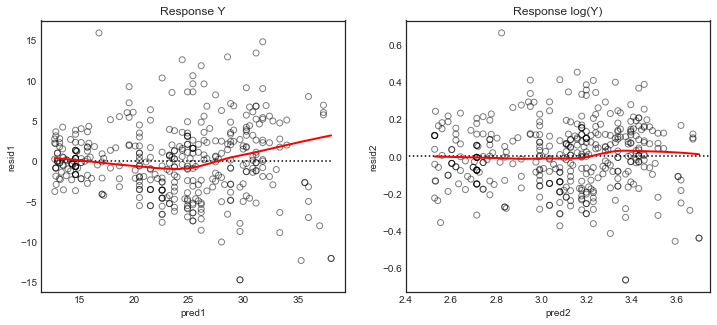

In [167]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.regplot(auto.pred1, auto.resid1, lowess=True,
            ax=ax1, line_kws={'color':'r', 'lw':2},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Response Y')

# Right plot
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':2}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_xlim(2.4,max(auto.pred2)+0.05)
ax2.set_title('Response log(Y)')




Sometimes we have a good idea of the variance of each response. For
example, the ith response could be an average of ni raw observations. If
each of these raw observations is uncorrelated with variance $\sigma^2$, then their
average has variance $\sigma^2_i = \sigma^2/n_i$. In this case a simple remedy is to fit our
model by <i style='color:orange'>weighted least squares</i>,

### 4.Outliers 
An outlier is a point for which yi is far from the value predicted by the
model. 
Outliers can arise for a variety of reasons, such as incorrect recording
of an observation during data collection.


In [168]:
np.random.seed(66)

X=np.random.normal(0,2,50)
Error=np.random.normal(0,0.5,50)
Y=1.5+X+Error
#Outliers (incorrect recording)
X[20]=0
Y[20]=5
d= {'X':X,'Y':Y}
datasim=pd.DataFrame(d)
estsim=smf.ols('Y ~ X', datasim).fit()
estsim.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     454.0
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           4.10e-26
Time:                        09:34:40   Log-Likelihood:                -53.343
No. Observations:                  50   AIC:                             110.7
Df Residuals:                      48   BIC:                             114.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6320      0.102     16.004      0.000       1.427       1.837
X              1.0009      0.047     21.307      0.000       0.906       1.095
==============================================================================
Omnibus:                       41.412   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.413
Skew:                           2.073   Prob(JB):                     8.12e-39
Kurtosis:                      11.185   Cond. No.                         2.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

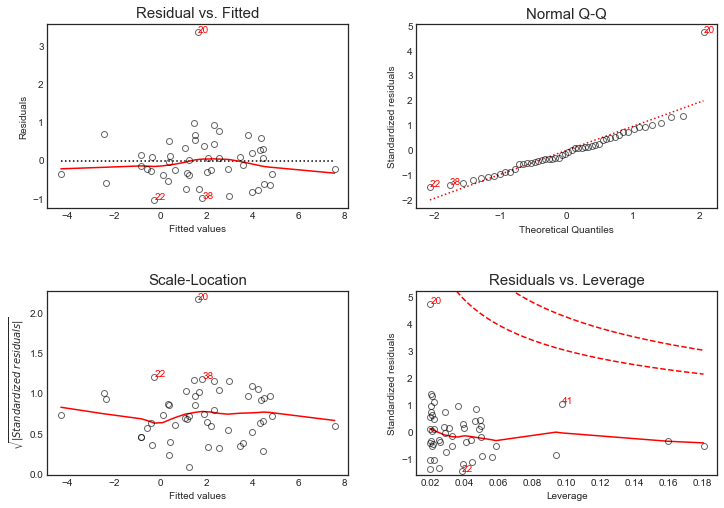

In [169]:
plt.figure(figsize=(10,7))
lmdiag.plot(estsim)

But in practice, it can be difficult to decide how large a residual
needs to be before we consider the point to be an outlier. To address
this problem, instead of plotting the residuals, we can plot the studentized
residuals, computed by dividing each residual $e_i$ by its estimated standard error.

In [170]:
datasimdrop=datasim.drop(index=20)
estsim=smf.ols('Y ~ X', datasimdrop).fit()
estsim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     840.9
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           1.21e-31
Time:                        09:34:41   Log-Likelihood:                -37.298
No. Observations:                  49   AIC:                             78.60
Df Residuals:                      47   BIC:                             82.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5626      0.076     20.583      0.000       1.410       1.715
X              1.0040      0.035     28.998      0.000       0.934       1.074
==============================================================================
Omnibus:                        1.878   Durbin-Watson:                   2.446
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.250
Skew:                           0.083   Prob(JB):                        0.535
Kurtosis:                       2.235   Cond. No.                         2.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this case, removing the outlier has little effect on the least squares
line: it leads to almost no change in the slope, and a miniscule reduction
in the intercept.


### 5.High leverage Points
We just saw that outliers are observations for which the response $y_i$ is
unusual given the predictor $x_i$. In contrast, observations with high leverage
have an unusual value for $x_i$.

In fact, high leverage observations tend to have
a sizable impact on the estimated regression line. It is cause for concern if
the least squares line is heavily affected by just a couple of observations,
because any problems with these points may invalidate the entire fit. For
this reason, it is important to identify high leverage observations.

In [171]:
datasim.iloc[41,:]=[4,13]
estsim=smf.ols('Y ~ X', datasim).fit()
estsim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     190.5
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           2.49e-18
Time:                        09:34:41   Log-Likelihood:                -80.642
No. Observations:                  50   AIC:                             165.3
Df Residuals:                      48   BIC:                             169.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7171      0.178      9.657      0.000       1.360       2.075
X              1.1315      0.082     13.802      0.000       0.967       1.296
==============================================================================
Omnibus:                       70.927   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              746.584
Skew:                           3.713   Prob(JB):                    7.61e-163
Kurtosis:                      20.413   Cond. No.                         2.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

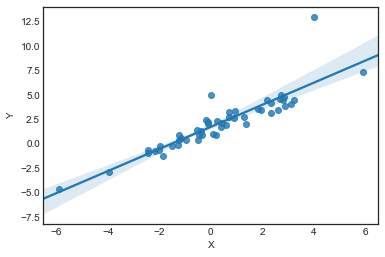

In [172]:
X=datasim.X
Y=datasim.Y
sns.regplot(X,Y)


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

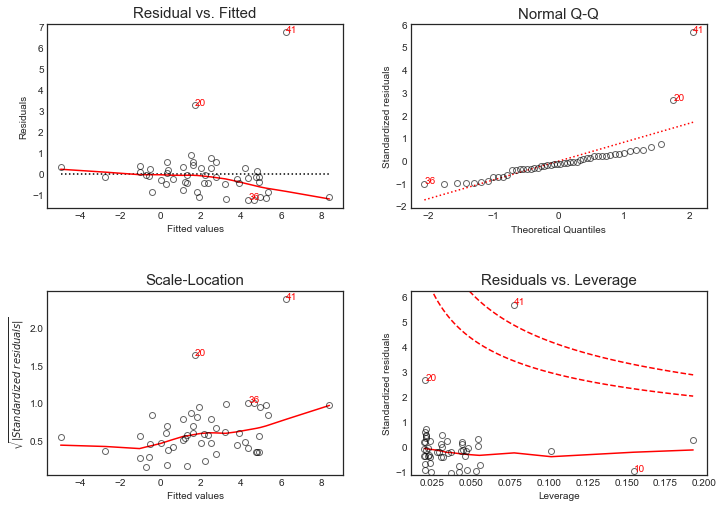

In [173]:

plt.figure(figsize=(10,7))
lmdiag.plot(estsim)

In order to quantify an observation’s leverage, we compute the leverage
statistic. A large value of this statistic indicates an observation with high
leverage. For a simple linear regression
\begin{align}
h_i=\dfrac{1}{n}+\frac{(x_i-\bar{x})}{\sum_{i^\prime=1}^n(x_{i^\prime}-\bar{x})^2}
\end{align}

### 6.Collinearity
Collinearity refers to the situation in which two or more predictor variables
are closely related to one another.

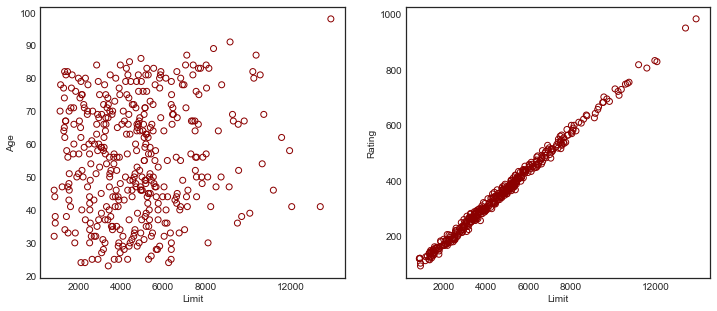

In [174]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(credit.Limit, credit.Age, facecolor='None', edgecolor='darkred')
ax1.set_ylabel('Age')

# Right plot
ax2.scatter(credit.Limit, credit.Rating, facecolor='None', edgecolor='darkred')
ax2.set_ylabel('Rating')

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000,4000,6000,8000,12000])

the predictors
limit and rating are very highly correlated with each other, and we say
that they are <i>collinear</i>. The presence of collinearity can pose problems in the regression context, since <b style="color:blue">it can be difficult to separate out the individual effects of collinear variables on the response</b>. In other words, since
limit and rating tend to increase or decrease together, <b style="color:blue">it can be difficult to
determine how each one separately is associated with the response </b>, <b style="color:orange">balance</b>.

In [175]:
Col1=smf.ols('Balance ~ Age+Limit', credit).fit()
print('Intercept:%.3f Age/Limit:%.3f, %.3f'%(Col1.params[0],Col1.params[1],Col1.params[2]))

Col2=smf.ols('Balance ~ Rating+Limit', credit).fit()
print('Intercept:%.3f rating/Limit:%.3f, %.3f'%(Col2.params[0],Col2.params[1],Col2.params[2]))


Intercept:-173.411 Age/Limit:-2.291, 0.173
Intercept:-377.537 rating/Limit:2.202, 0.025


In [176]:
y = credit.Balance

# Regression for left plot
X = credit[['Age', 'Limit']].as_matrix()
regr1 = skl_lm.LinearRegression()
regr1.fit(scale(X.astype('float'), with_std=False), y)

X2 = credit[['Rating', 'Limit']].as_matrix()
regr2 = skl_lm.LinearRegression()
regr2.fit(scale(X2.astype('float'), with_std=False), y)

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))


# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled +Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled +Y2[i,j]*Rating_scaled))**2).sum()/1000000
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



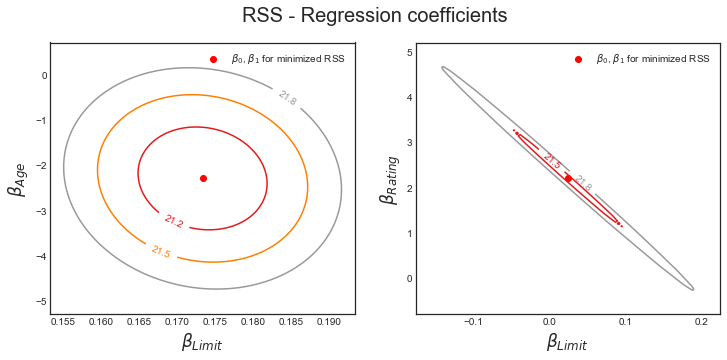

In [177]:
fig = plt.figure(figsize=(12,5))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
    
# Left plot
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# Right plot
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
    ax.legend()

In [178]:
est_Age = smf.ols('Age ~ Rating + Limit', credit).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', credit).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', credit).fit()

print(1/(1-est_Age.rsquared))
print(1/(1-est_Rating.rsquared))
print(1/(1-est_Limit.rsquared))

1.0113846860681328
160.66830095856935
160.59287978597942


# Reference
James, G., Witten, D., Hastie, T., Tibshirani, R. (2013). <I>An Introduction to Statistical Learning with Applications in  R</I>,  Springer Science+Business Media, New York.
http://www-bcf.usc.edu/~gareth/ISL/index.html


